In [2]:
import networkx as nx
import random
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
#from google.colab import drive
#drive.mount('/content/gdrive')

# **FIND PATIENT MOTIFS**

In [12]:
def find_patient_motifs(csv_file):
  # Create a directed graph
  G = nx.MultiDiGraph()

  # Read in the edges and attributes from the CSV file
  with open(csv_file, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
      source = row['source']
      target = row['target']
      attr = {key: value for key, value in row.items() if key not in ['source', 'target']}
      G.add_edge(source, target, **attr)
  motif_types = ['positivecascade', 'negativecascade', 'coherenttype1', 'coherenttype2', 'coherenttype3', 'coherenttype4', 
                'incoherenttype1', 'incoherenttype2', 'incoherenttype3', 'incoherenttype4', 
                "PFB3.1", "PFB3.2","PFB3.3","PFB3.4","NFB3.1","NFB3.2","NFB3.3","NFB3.4",
                'PFB2.1', 'PFB2.2',"NFB2.1","NFB2.2"]
  patient_motifcounts = dict.fromkeys(motif_types, 0)
  patient_motifs = {s.replace('type', 'type'): [] for s in motif_types}
  #TWO NODE POSITIVE AND NEGATIVE FEEDBACK LOOPS
  #A->B->A
  #PFB2.1
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a positive relation
                if edge2[1]==node and edge2[2]["regulation"] == 'positive': 
                    patient_motifs['PFB2.1'].append(((node, edge1[1]),edge1[2],edge2[2]))
                    patient_motifcounts['PFB2.1'] += 1
  #PFB2.2
  #A-IB->A                   
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'negative':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[1]==node and edge2[2]["regulation"] == 'positive': 
                    patient_motifs['PFB2.2'].append(((node, edge1[1]),edge1[2],edge2[2]))
                    patient_motifcounts['PFB2.2'] += 1
  #NFB2.1
  #A->B-IA                        
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[1]==node and edge2[2]["regulation"] == 'negative': 
                    patient_motifs['NFB2.1'].append(((node, edge1[1]),edge1[2],edge2[2]))
                    patient_motifcounts['NFB2.1'] += 1
  #NFB2.1               
  #A-IB-IA                     
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'negative':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[1]==node and edge2[2]["regulation"] == 'negative': 
                    patient_motifs['NFB2.2'].append(((node, edge1[1]),edge1[2],edge2[2]))
                    patient_motifcounts['NFB2.2'] += 1

  #TRIPLE POSITIVE AND NEGATIVE FEEDBACK LOOPS
  #PFB3.1
  #A->B->C->A
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'positive':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]][0]['regulation'] == 'positive'):
                              patient_motifs['PFB3.1'].append(((node, edge1[1], edge2[1]), edge1[2], edge2[2], G[edge2[1]][edge1[0]][0]))
                              patient_motifcounts['PFB3.1'] += 1
  #F2
  #A->B-IC->A                            
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'negative':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]][0]['regulation'] == 'positive'):
                              patient_motifs['PFB3.2'].append(((node, edge1[1], edge2[1]), edge1[2], edge2[2], G[edge2[1]][edge1[0]][0]))
                              patient_motifcounts['PFB3.2'] += 1

  #F3
  #A-IB->C->A                            
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                #print(edge2)
                #print(edge2[2]["regulation"])
                  # Check if the edge has a positive relation
                if edge2[2]["regulation"] == 'positive':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]][0]['regulation'] == 'positive'):
                              patient_motifs['PFB3.3'].append(((node, edge1[1], edge2[1]), edge1[2], edge2[2], G[edge2[1]][edge1[0]][0]))
                              patient_motifcounts['PFB3.3'] += 1

  #F4
  #A-IB-IC->A                            
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                #print(edge2)
                #print(edge2[2]["regulation"])
                  # Check if the edge has a positive relation
                if edge2[2]["regulation"] == 'negative':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]][0]['regulation'] == 'positive'):
                              patient_motifs['PFB3.4'].append(((node, edge1[1], edge2[1]), edge1[2], edge2[2], G[edge2[1]][edge1[0]][0]))
                              patient_motifcounts['PFB3.4'] += 1
  #NF1                            
  #A->B->C-IA                            
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                #print(edge2)
                #print(edge2[2]["regulation"])
                  # Check if the edge has a positive relation
                if edge2[2]["regulation"] == 'positive':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]][0]['regulation'] == 'negative'):
                              patient_motifs['NFB3.1'].append(((node, edge1[1], edge2[1]), edge1[2], edge2[2], G[edge2[1]][edge1[0]][0]))
                              patient_motifcounts['NFB3.1'] += 1

  #NF2                            
  #A->B-IC-IA                            
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                #print(edge2)
                #print(edge2[2]["regulation"])
                  # Check if the edge has a positive relation
                if edge2[2]["regulation"] == 'negative':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]][0]['regulation'] == 'negative'):
                              patient_motifs['NFB3.2'].append(((node, edge1[1], edge2[1]), edge1[2], edge2[2], G[edge2[1]][edge1[0]][0]))
                              patient_motifcounts['NFB3.2'] += 1

  #A-IB->C-IA                            
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                #print(edge2)
                #print(edge2[2]["regulation"])
                  # Check if the edge has a positive relation
                if edge2[2]["regulation"] == 'positive':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]][0]['regulation'] == 'negative'):
                              patient_motifs['NFB3.3'].append(((node, edge1[1], edge2[1]), edge1[2], edge2[2], G[edge2[1]][edge1[0]][0]))
                              patient_motifcounts['NFB3.3'] += 1

  #A-IB-IC-IA                            
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                #print(edge2)
                #print(edge2[2]["regulation"])
                  # Check if the edge has a positive relation
                if edge2[2]["regulation"] == 'negative':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]][0]['regulation'] == 'negative'):
                              patient_motifs['NFB3.4'].append(((node, edge1[1], edge2[1]), edge1[2], edge2[2], G[edge2[1]][edge1[0]][0]))
                              patient_motifcounts['NFB3.4'] += 1                             
  #X->Y->Z
  #positivecascade
  #A->B->C
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
        if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                  if edge2[2]["regulation"] == 'positive':
                     if edge2[1] != node:
                          patient_motifs['positivecascade'].append(((node, edge1[1], edge2[1]),edge1[2],edge2[2]))
                          patient_motifcounts['positivecascade'] += 1  
  #negativecascade                         
  #X-ıYı-ıZ
  for node in G.nodes():
    out_edges = G.out_edges(node, data=True)
    for edge1 in out_edges:
        if edge1[2]["regulation"] == 'negative':
            out_edges_2 = G.out_edges(edge1[1], data=True)
            for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'negative':
                    # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                    if edge2[1] != node:
                          patient_motifs['negativecascade'].append(((node, edge1[1], edge2[1]),edge1[2],edge2[2]))
                          patient_motifcounts['negativecascade'] += 1  
  
  #X->Y->Z
  #X->Z
  #Coherent I FFL
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'positive':
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                          if(G[edge1[0]][edge2[1]][0]['regulation'] == 'positive'):
                              patient_motifs['coherenttype1'].append(((node, edge1[1], edge2[1]),edge1[2],edge2[2],G[edge1[0]][edge2[1]][0]))
                              patient_motifcounts['coherenttype1'] += 1
                          
  #X-IY->Z
  #X-IZ
  #Coherent II FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a negative relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a positive relation
                  if edge2[2]["regulation"] == 'positive':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]][0]['regulation'] == 'negative':
                              patient_motifs['coherenttype2'].append(((node, edge1[1], edge2[1]),edge1[2],edge2[2],G[edge1[0]][edge2[1]][0]))
                              patient_motifcounts['coherenttype2'] += 1

  #X->Y-IZ
  #X-IZ
  #Coherent III FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a negative relation
                  if edge2[2]["regulation"] == 'negative':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]][0]['regulation'] == 'negative':
                              patient_motifs['coherenttype3'].append(((node, edge1[1], edge2[1]),edge1[2],edge2[2],G[edge1[0]][edge2[1]][0]))
                              patient_motifcounts['coherenttype3'] += 1
  #X-IY-IZ
  #X->Z
  #Coherent IV FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a negative relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a negative relation
                  if edge2[2]["regulation"] == 'negative':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]][0]['regulation'] == 'positive':
                              patient_motifs['coherenttype4'].append(((node, edge1[1], edge2[1]),edge1[2],edge2[2],G[edge1[0]][edge2[1]][0]))
                              patient_motifcounts['coherenttype4'] += 1

  #X->Y-IZ
  #X->Z
  #Incoherent I FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a negative relation
                  if edge2[2]["regulation"] == 'negative':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]][0]['regulation'] == 'positive':
                              patient_motifs['incoherenttype1'].append(((node, edge1[1], edge2[1]),edge1[2],edge2[2],G[edge1[0]][edge2[1]][0]))
                              patient_motifcounts['incoherenttype1'] += 1

  #X-IY-IZ
  #X-IZ
  #Incoherent II FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a negative relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a negative relation
                  if edge2[2]["regulation"] == 'negative':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]][0]['regulation'] == 'positive':
                              patient_motifs['incoherenttype2'].append(((node, edge1[1], edge2[1]),edge1[2],edge2[2],G[edge1[0]][edge2[1]][0]))
                              patient_motifcounts['incoherenttype2'] += 11

  #X->Y->Z
  #X-IZ
  #Incoherent III FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a positive relation
                  if edge2[2]["regulation"] == 'positive':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]][0]['regulation'] == 'negative':
                              patient_motifs['incoherenttype3'].append(((node, edge1[1], edge2[1]),edge1[2],edge2[2],G[edge1[0]][edge2[1]][0]))
                              patient_motifcounts['incoherenttype3'] += 1

  #X-IY->Z
  #X->Z
  #Incoherent IV FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a negative relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a positive relation
                  if edge2[2]["regulation"] == 'positive':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]][0]['regulation'] == 'positive':
                              patient_motifs['incoherenttype4'].append(((node, edge1[1], edge2[1]),edge1[2],edge2[2],G[edge1[0]][edge2[1]][0]))
                              patient_motifcounts['incoherenttype4'] += 1
                           
  return patient_motifs,patient_motifcounts    

In [21]:
%%time
patient_motifs,patient_motifcounts=find_patient_motifs("kinase_phospho.csv")

CPU times: user 3.69 ms, sys: 0 ns, total: 3.69 ms
Wall time: 10.3 ms


# **RANDOM NETWORKS**

**Generating random networks with the real networks node size and edge probability**

**For Random Networks, same function but it takes the network as parameter**

In [14]:
def random_patient_motifs(G):
  motif_types = ['positivecascade', 'negativecascade', 'coherenttype1', 'coherenttype2', 'coherenttype3', 'coherenttype4', 
                'incoherenttype1', 'incoherenttype2', 'incoherenttype3', 'incoherenttype4', 
                "PFB3.1", "PFB3.2","PFB3.3","PFB3.4","NFB3.1","NFB3.2","NFB3.3","NFB3.4",
                'PFB2.1', 'PFB2.2',"NFB2.1","NFB2.2"]
  
  random_motifcounts = dict.fromkeys(motif_types, 0)
  random_motifs = {s.replace('type', 'type'): [] for s in motif_types}
  #TWO NODE POSITIVE AND NEGATIVE FEEDBACK LOOPS
  #A->B->A
  #PFB2.1
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[1]==node and edge2[2]["regulation"] == 'positive': 
                    random_motifs['PFB2.1'].append((node, edge1[1]))
                    random_motifcounts['PFB2.1'] += 1
  #PFB2.2
  #A-IB->A                   
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'negative':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[1]==node and edge2[2]["regulation"] == 'positive': 
                    random_motifs['PFB2.2'].append((node, edge1[1]))
                    random_motifcounts['PFB2.2'] += 1
  #NFB2.1
  #A->B-IA                        
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[1]==node and edge2[2]["regulation"] == 'negative': 
                    random_motifs['NFB2.1'].append((node, edge1[1]))
                    random_motifcounts['NFB2.1'] += 1
  #NFB2.1               
  #A-IB-IA                     
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'negative':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[1]==node and edge2[2]["regulation"] == 'negative': 
                    random_motifs['NFB2.2'].append((node, edge1[1]))
                    random_motifcounts['NFB2.2'] += 1

  #TRIPLE POSITIVE AND NEGATIVE FEEDBACK LOOPS
  #PFB3.1
  #A->B->C->A
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'positive':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]]['regulation'] == 'positive'):
                              random_motifs['PFB3.1'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['PFB3.1'] += 1
  #PFB3.2
  #A->B-IC->A                            
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'negative':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]]['regulation'] == 'positive'):
                              random_motifs['PFB3.2'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['PFB3.2'] += 1

  #PFB3.3
  #A-IB->C->A                            
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'negative':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'positive':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]]['regulation'] == 'positive'):
                              random_motifs['PFB3.3'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['PFB3.3'] += 1

  #PFB3.4
  #A-IB-IC->A                            
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'negative':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'negative':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]]['regulation'] == 'positive'):
                              random_motifs['PFB3.4'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['PFB3.4'] += 1
  #NFB3.1                            
  #A->B->C-IA                            
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'positive':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]]['regulation'] == 'negative'):
                              random_motifs['NFB3.1'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['NFB3.1'] += 1

  #NFB3.2                            
  #A->B-IC-IA                            
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'positive':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'negative':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]]['regulation'] == 'negative'):
                              random_motifs['NFB3.2'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['NFB3.2'] += 1

  #NFB3.3
  #A-IB->C-IA                            
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'negative':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'positive':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]]['regulation'] == 'negative'):
                              random_motifs['NFB3.3'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['NFB3.3'] += 1

  #A-IB-IC-IA                            
  for node in G.nodes():
      out_edges = G.out_edges(node, data=True)
      for edge1 in out_edges:
          if edge1[2]["regulation"] == 'negative':
              out_edges_2 = G.out_edges(edge1[1], data=True)
              for edge2 in out_edges_2:
                if edge2[2]["regulation"] == 'negative':
                      if edge2[1] != node and (edge2[1],edge1[0]) in G.edges():
                          if(G[edge2[1]][edge1[0]]['regulation'] == 'negative'):
                              random_motifs['NFB3.4'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['NFB3.4'] += 1                             
  #X->Y->Z
  #positivecascade
  #A->B->C
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
        if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a positive relation
                  if edge2[2]["regulation"] == 'positive':
                     if edge2[1] != node:
                          random_motifs['positivecascade'].append((node, edge1[1], edge2[1]))
                          random_motifcounts['positivecascade'] += 1  
  #negativecascade                         
  #X-ıYı-ıZ
  for node in G.nodes():
    # Get all the outgoing edges from the node
    out_edges = G.out_edges(node, data=True)
    # Iterate over the outgoing edges
    for edge1 in out_edges:
        # Check if the edge has a positive relation
        if edge1[2]["regulation"] == 'negative':
            # Get all the outgoing edges from the target of the first edge
            out_edges_2 = G.out_edges(edge1[1], data=True)
            # Iterate over the second set of outgoing edges
            for edge2 in out_edges_2:
                # Check if the edge has a positive relation
                if edge2[2]["regulation"] == 'negative':
                    # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                    if edge2[1] != node:
                          random_motifs['negativecascade'].append((node, edge1[1], edge2[1]))
                          random_motifcounts['negativecascade'] += 1  
  
  #X->Y->Z
  #X->Z
  #Coherent I FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                #print(edge2)
                #print(edge2[2]["regulation"])
                  # Check if the edge has a positive relation
                if edge2[2]["regulation"] == 'positive':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                          if(G[edge1[0]][edge2[1]]['regulation'] == 'positive'):
                              random_motifs['coherenttype1'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['coherenttype1'] += 1
                          
  #X-IY->Z
  #X-IZ
  #Coherent II FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a negative relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a positive relation
                  if edge2[2]["regulation"] == 'positive':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]]['regulation'] == 'negative':
                              random_motifs['coherenttype2'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['coherenttype2'] += 1

  #X->Y-IZ
  #X-IZ
  #Coherent III FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a negative relation
                  if edge2[2]["regulation"] == 'negative':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]]['regulation'] == 'negative':
                              random_motifs['coherenttype3'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['coherenttype3'] += 1
  #X-IY-IZ
  #X->Z
  #Coherent IV FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a negative relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a negative relation
                  if edge2[2]["regulation"] == 'negative':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]]['regulation'] == 'positive':
                              random_motifs['coherenttype4'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['coherenttype4'] += 1

  #X->Y-IZ
  #X->Z
  #Incoherent I FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a negative relation
                  if edge2[2]["regulation"] == 'negative':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]]['regulation'] == 'positive':
                              random_motifs['incoherenttype1'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['incoherenttype1'] += 1

  #X-IY-IZ
  #X-IZ
  #Incoherent II FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a negative relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a negative relation
                  if edge2[2]["regulation"] == 'negative':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]]['regulation'] == 'positive':
                              random_motifs['incoherenttype2'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['incoherenttype2'] += 11

  #X->Y->Z
  #X-IZ
  #Incoherent III FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a positive relation
          if edge1[2]["regulation"] == 'positive':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a positive relation
                  if edge2[2]["regulation"] == 'positive':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]]['regulation'] == 'negative':
                              random_motifs['incoherenttype3'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['incoherenttype3'] += 1

  #X-IY->Z
  #X->Z
  #Incoherent IV FFL
  for node in G.nodes():
      # Get all the outgoing edges from the node
      out_edges = G.out_edges(node, data=True)
      # Iterate over the outgoing edges
      for edge1 in out_edges:
          # Check if the edge has a negative relation
          if edge1[2]["regulation"] == 'negative':
              # Get all the outgoing edges from the target of the first edge
              out_edges_2 = G.out_edges(edge1[1], data=True)
              # Iterate over the second set of outgoing edges
              for edge2 in out_edges_2:
                  # Check if the edge has a positive relation
                  if edge2[2]["regulation"] == 'positive':
                      # Check if the target of the second edge is the same as the source of the first edge, forming the X->Y->Z motif
                      if edge2[1] != node and edge2[1] in G.neighbors(edge1[0]):
                        if (edge1[0], edge2[1]) in G.edges():
                            if G[edge1[0]][edge2[1]]['regulation'] == 'positive':
                              random_motifs['incoherenttype4'].append((node, edge1[1], edge2[1]))
                              random_motifcounts['incoherenttype4'] += 1
                           
  return random_motifs,random_motifcounts           

**Checking the network size and edge probability**

In [15]:
  graph = nx.MultiDiGraph()
  # Read in the edges and attributes from the CSV file
  csv_file = "kinase_phospho.csv"
  with open(csv_file, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
      source = row['source']
      target = row['target']
      attr = {key: value for key, value in row.items() if key not in ['source', 'target']}
      graph.add_edge(source, target, **attr)
num_nodes = graph.number_of_nodes()
print(f'Number of nodes in the graph: {num_nodes}')

# Find the number of edges in the graph
num_edges = graph.number_of_edges()

# Find the number of possible edges in the graph
num_possible_edges = graph.number_of_nodes() * (graph.number_of_nodes() - 1)

# Calculate the probability of each edge being present in the graph
probability = num_edges / num_possible_edges
print(f'Probability of each edge being present in the graph: {probability:.2f}')

Number of nodes in the graph: 6
Probability of each edge being present in the graph: 0.27


In [16]:
#Taking average of the dictionaries with same key names in a list
from collections import defaultdict
def average_dicts(dicts):
    average_dict = defaultdict(int)
    num_dicts = len(dicts)
    for d in dicts:
        for key, value in d.items():
            average_dict[key] += value
    for key in average_dict:
        average_dict[key] /= num_dicts
    return dict(average_dict)

**Checking the percentage of positive and negative regulations**

In [17]:
df = pd.read_csv("kinase_phospho.csv")
positive_count = df["regulation"].value_counts()["positive"]
negative_count = df["regulation"].value_counts()["negative"]
total_count = df.shape[0]
percent_positive = (positive_count / total_count) * 100
percent_negative = (negative_count / total_count) * 100
print("Percentage of positive:", percent_positive)
print("Percentage of negative:", percent_negative)

Percentage of positive: 87.5
Percentage of negative: 12.5


In [22]:
%%time
# Initialize a list to store the counts of each motif in 10,50 or 100 random networks
motif_counts_in_random_networks = []
# Define the number of random networks to generate
num_random_networks = 10
for i in range(num_random_networks):
  random_network = nx.erdos_renyi_graph(num_nodes, probability, directed=True)
  for edge in random_network.edges:
    if random.random() > percent_positive:
      random_network[edge[0]][edge[1]]['regulation'] = 'positive'
    else:
      random_network[edge[0]][edge[1]]['regulation'] = 'negative'
  # Count the number of motifs in the random network
  random_motifs,random_motifcounts=random_patient_motifs(random_network)
  motif_counts_in_random_networks.append(random_motifcounts)
random_motifcounts_averaged=average_dicts(motif_counts_in_random_networks)
print(average_dicts(motif_counts_in_random_networks))

{'positivecascade': 0.0, 'negativecascade': 7.6, 'coherenttype1': 0.0, 'coherenttype2': 0.0, 'coherenttype3': 0.0, 'coherenttype4': 0.0, 'incoherenttype1': 0.0, 'incoherenttype2': 0.0, 'incoherenttype3': 0.0, 'incoherenttype4': 0.0, 'PFB3.1': 0.0, 'PFB3.2': 0.0, 'PFB3.3': 0.0, 'PFB3.4': 0.0, 'NFB3.1': 0.0, 'NFB3.2': 0.0, 'NFB3.3': 0.0, 'NFB3.4': 2.4, 'PFB2.1': 0.0, 'PFB2.2': 0.0, 'NFB2.1': 0.0, 'NFB2.2': 2.6}
CPU times: user 24.2 ms, sys: 0 ns, total: 24.2 ms
Wall time: 37.8 ms


# **VISUALIZATION**

**COMPARISON OF REAL AND RANDOM DATA**

**Visualize patient and random motif counts in log-scale, then select the significant mofis for patients**

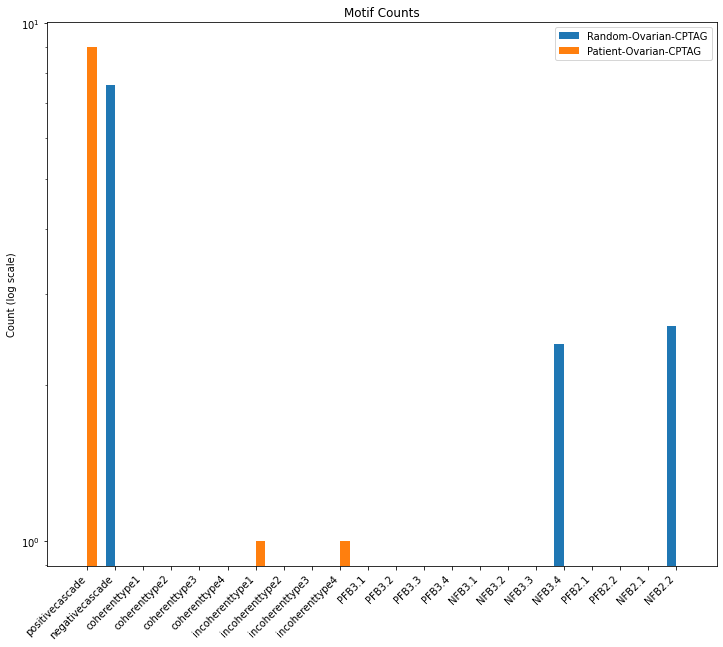

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
labels = list(random_motifcounts_averaged.keys())
x = np.arange(len(labels))
width = 0.35
rects1 = ax.bar(x - width/2, list(random_motifcounts_averaged.values()), width, label='Random-Ovarian-CPTAG')
rects2 = ax.bar(x + width/2, list(patient_motifcounts.values()), width, label='Patient-Ovarian-CPTAG')
ax.set_ylabel('Count (log scale)')
ax.set_title('Motif Counts')
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.show()

# **PATIENT NETWORKS**

**After searching for significant motifs for each patient column, we obtained a dictionary as :**

## **motif_dict**={**sample1**:{*motif1*:(A,B,C)},{*motif2*:(D,B,C)},{**sample2**:{motif1:(A,B,C),{*motif2*:(D,B,C)}} 

**This dictionary has samples' motifs' if at least one protein is in the significant proteins list of that sample. We will check the motif-sample pairs with a heatmap.**

In [25]:
def find_patient_significantmotifs(csv_file, dictionary):
    df = pd.read_csv(csv_file)
    motif_names = ["positivecascade", "coherenttype1", "coherenttype2", "incoherenttype1", "PFB3.1", "PFB2.1"]
    logfoldchange_columns = [col for col in df.columns if col.startswith('LogRatio')]
    patient_sigmotif_dict = {}
    for column in logfoldchange_columns:
          patient_sigmotif_dict[column] = {}
          for motif_name in motif_names:
            patient_sigmotif_dict[column][motif_name] = []
    for patient_motif_name in patient_motifs:
        if patient_motif_name in motif_names:
          motifs = patient_motifs[patient_motif_name]
          for column in logfoldchange_columns:
            significant_genes = set(df.loc[abs(df[column]) > 1.5, ['target', 'source']].values.ravel())
            for motif in motifs:
                genes_in_motif = [gene for gene in motif[0] if gene in significant_genes]
                if len(genes_in_motif) >0:
                    patient_sigmotif_dict[column][patient_motif_name].append(motif)
    return patient_sigmotif_dict

In [30]:
%%time
patient_sigmotif_dict=find_patient_significantmotifs("kinase_phospho.csv",patient_motifs)

CPU times: user 25.9 ms, sys: 0 ns, total: 25.9 ms
Wall time: 31.2 ms


In [70]:
patient_sigmotif_dict

{'LogRatio.1': {'positivecascade': [(('DNAPK', 'ZMYND8', 'XRCC4'),
    {'Phosphosite': 'NP_001268702.1',
     'Position': '425',
     'AminoAcid': 'S',
     'regulation': 'positive',
     'LogRatio.1': '1.6',
     'LogRatio.2': '0'},
    {'Phosphosite': 'NP_001268702.1',
     'Position': '668',
     'AminoAcid': 'S',
     'regulation': 'positive',
     'LogRatio.1': '1.8',
     'LogRatio.2': '0'}),
   (('DNAPK', 'ZFHX3', 'XRCC4'),
    {'Phosphosite': 'NP_008816.3',
     'Position': '3409',
     'AminoAcid': 'S',
     'regulation': 'positive',
     'LogRatio.1': '0.268181385',
     'LogRatio.2': '0'},
    {'Phosphosite': 'NP_008816.3',
     'Position': '571',
     'AminoAcid': 'S',
     'regulation': 'positive',
     'LogRatio.1': '1.8',
     'LogRatio.2': '0'}),
   (('ZMYND8', 'XRCC4', 'USP7'),
    {'Phosphosite': 'NP_001268702.1',
     'Position': '668',
     'AminoAcid': 'S',
     'regulation': 'positive',
     'LogRatio.1': '1.8',
     'LogRatio.2': '0'},
    {'Phosphosite': 'NP_001

In [71]:
def create_graph_from_dict(dictionary):
    graphs = {}
    for log_ratio_key, log_ratio_val in dictionary.items():
        G = nx.MultiDiGraph()
        for cascade_type, cascade_list in log_ratio_val.items():
            #G.clear()
            for cascade in cascade_list:
                nodes = cascade[0]
                edges = ((nodes[i], nodes[i+1], cascade[1]) for i in range(len(nodes)-1))
                G.add_edges_from(edges)
        graphs[log_ratio_key] = G.copy()
    return graphs

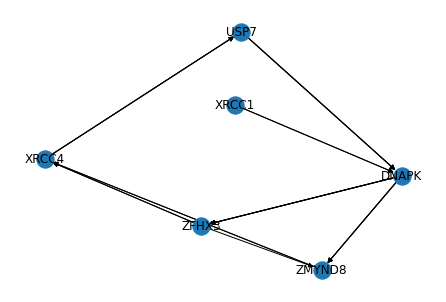

CPU times: user 323 ms, sys: 239 ms, total: 562 ms
Wall time: 326 ms


In [73]:
%%time
graphs=create_graph_from_dict(patient_sigmotif_dict)
nx.draw(graphs["LogRatio.1"], with_labels=True)
plt.show()

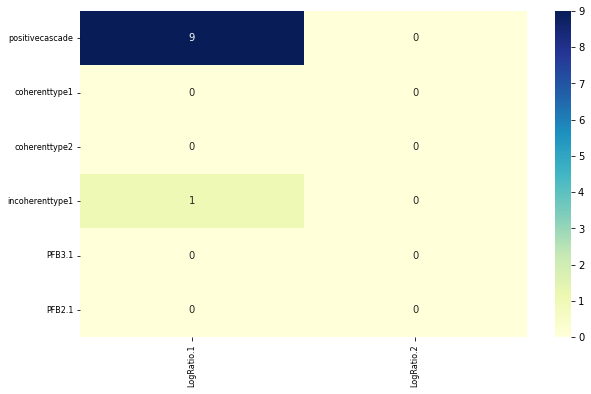

In [75]:
df=pd.DataFrame.from_dict(patient_sigmotif_dict)
df_count=df.applymap(lambda x: len(x))
plt.figure(figsize=(10,6))
sns.heatmap(df_count, annot=True, cmap='YlGnBu')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()